In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Import the data

In [2]:
# First we load all the data
numerical = pd.read_csv('numerical.csv')
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [3]:
categorical = pd.read_csv('categorical-2.csv')
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12


In [4]:
target = pd.read_csv('target.csv')
target

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


#  Check the datatypes of all the columns in the data.

In [5]:
#checking the data types of numericals
numerical.dtypes
# Check for object columns
object_columns = numerical.select_dtypes(include='object').columns

# Print the object columns
print("Object columns:", object_columns)

# here all our numericals are int type , so we need not do anything

Object columns: Index([], dtype='object')


In [6]:
#checking the data types of categoricals
categorical.dtypes

# there are so many columns that are int type so we convert it into object type

STATE           object
CLUSTER          int64
HOMEOWNR        object
GENDER          object
DATASRCE         int64
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B         int64
ODATEW_YR        int64
ODATEW_MM        int64
DOB_YR           int64
DOB_MM           int64
MINRDATE_YR      int64
MINRDATE_MM      int64
MAXRDATE_YR      int64
MAXRDATE_MM      int64
LASTDATE_YR      int64
LASTDATE_MM      int64
FIRSTDATE_YR     int64
FIRSTDATE_MM     int64
dtype: object

In [7]:

# Columns to convert to object type
columns_to_convert = ['CLUSTER', 'DATASRCE', 'DOMAIN_B', 'ODATEW_YR', 'ODATEW_MM', 
                      'DOB_YR', 'DOB_MM', 'MINRDATE_YR', 'MINRDATE_MM', 'MAXRDATE_YR', 
                      'MAXRDATE_MM', 'LASTDATE_YR', 'LASTDATE_MM', 'FIRSTDATE_YR', 
                      'FIRSTDATE_MM']

for col in columns_to_convert:
    categorical[col] = categorical[col].astype(str)

categorical.dtypes

STATE           object
CLUSTER         object
HOMEOWNR        object
GENDER          object
DATASRCE        object
RFA_2R          object
RFA_2A          object
GEOCODE2        object
DOMAIN_A        object
DOMAIN_B        object
ODATEW_YR       object
ODATEW_MM       object
DOB_YR          object
DOB_MM          object
MINRDATE_YR     object
MINRDATE_MM     object
MAXRDATE_YR     object
MAXRDATE_MM     object
LASTDATE_YR     object
LASTDATE_MM     object
FIRSTDATE_YR    object
FIRSTDATE_MM    object
dtype: object

# Concatenate numerical and categorical back together again for your X dataframe.

In [8]:
# Concatenate numerical and categorical data along columns (axis=1) and TARGET_B is our target
X = pd.concat([numerical,categorical], axis=1)
y = target['TARGET_B']

In [9]:
X

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,0,60.000000,5,9,0,0,39,34,18,10,...,37,12,92,8,94,2,95,12,89,11
1,1,46.000000,6,9,16,0,15,55,11,6,...,52,2,93,10,95,12,95,12,93,10
2,1,61.611649,3,1,2,0,20,29,33,6,...,0,2,91,11,92,7,95,12,90,1
3,0,70.000000,1,4,2,0,23,14,31,3,...,28,1,87,11,94,11,95,12,87,2
4,0,78.000000,3,2,60,1,28,9,53,26,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,2,96,2,96,2,96,2,96,2
95408,1,48.000000,7,9,1,0,31,43,19,4,...,50,1,96,3,96,3,96,3,96,3
95409,1,60.000000,5,9,0,0,18,46,20,7,...,38,1,96,3,95,1,96,10,94,10
95410,0,58.000000,7,9,0,0,28,35,20,9,...,40,5,90,11,96,8,97,1,86,12


# Split the data into a training set and a test set.

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
import numpy as np 
# Split further into train_num and train_cat. Also test_num and test_cat.
train_num = X_train.select_dtypes(np.number)
train_cat = X_train.select_dtypes(object)

test_num = X_test.select_dtypes(np.number)
test_cat = X_test.select_dtypes(object)

print(train_num.shape)
print(train_cat.shape)

(76329, 315)
(76329, 22)


In [12]:
#Scale the features using MinMaxScaler (train_num, test_num)
from sklearn.preprocessing import MinMaxScaler

# Scaling/Normalizing the data
transformer = MinMaxScaler().fit(train_num)
x_normalized = transformer.transform(train_num)
train_num_scaled = pd.DataFrame(x_normalized, columns=train_num.columns)
train_num_scaled
    

#applying the transformer to our test set

x_normalized_test = transformer.transform(test_num)
test_num_scaled = pd.DataFrame(x_normalized_test, columns=test_num.columns)


In [13]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Encoding our data with OneHotEncoder
encoder = OneHotEncoder(drop='first', handle_unknown='ignore').fit(train_cat)
cols = encoder.get_feature_names_out(input_features=train_cat.columns)
onehot_encoded = pd.DataFrame(encoder.transform(train_cat).toarray(),columns=cols)
onehot_encoded


#applying encoder on our test set:
test_cat_encoded = pd.DataFrame(encoder.transform(test_cat).toarray(),columns=cols)
test_cat_encoded



/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 12, 14] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,...,FIRSTDATE_MM_11,FIRSTDATE_MM_12,FIRSTDATE_MM_2,FIRSTDATE_MM_3,FIRSTDATE_MM_4,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE_MM_7,FIRSTDATE_MM_8,FIRSTDATE_MM_9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
# Concatenate scaled numerical and encoded categorical features
X_train_processed = pd.concat((train_num_scaled,onehot_encoded),axis=1)
X_test_processed = pd.concat((test_num_scaled,test_cat_encoded),axis=1)


# Fit a logistic regression (classification) model on the training data.

In [15]:
#using logistic model
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_processed, y_train)

predictions = classification.predict(X_test_processed)
predictions
classification.score(X_test_processed, y_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9487501965099827

# Checking the accuracy on the test data.

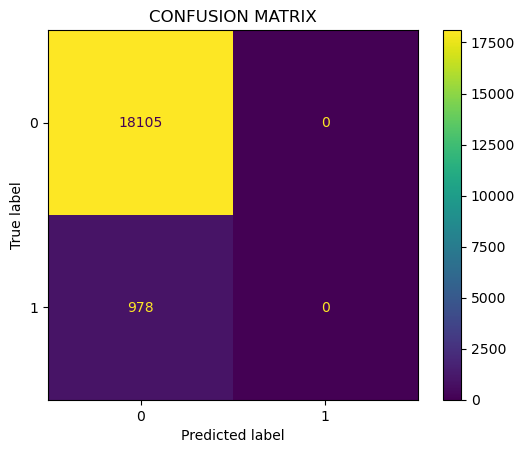

Accuracy:  0.9487501965099827
Precision:  0.0
Recall:  0.0
F1 Score:  0.0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#predictions using a confusion matrix:
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classification.classes_)
cm_display.plot()
plt.title('CONFUSION MATRIX')
plt.show()

# looking at predictions parameters:
print("Accuracy: ",accuracy_score(y_test,predictions))
print("Precision: ",precision_score(y_test,predictions))
print("Recall: ",recall_score(y_test,predictions))
print("F1 Score: ",f1_score(y_test,predictions))

In [17]:
# Here we see the Accuracy score is really high. But we also see that we have not predicted any of the donors.May be because of the imbalance.
#Lets check for the imbalance in data.

# Managing imbalance in the dataset

Check for the imbalance.

In [18]:
# there is a clear imbalance.People didnt even donate after mailing.
target['TARGET_B'].value_counts()

TARGET_B
0    90569
1     4843
Name: count, dtype: int64

# Upsampling

In [19]:
# Concat the train_data and the target. 

import pandas as pd

# Assuming X_train_processed is a DataFrame
X_train_processed = pd.DataFrame(X_train_processed)

# Convert y_train to a DataFrame (not Series) to match X_train_processed
y_train = pd.DataFrame(y_train).reset_index(drop=True)
y_train['TARGET_B'].value_counts()
# Concatenate X_train_processed and y_train along columns
train_data = pd.concat([X_train_processed, y_train], axis=1)


In [20]:

# Separate majority and minority classes
majority_class = train_data[train_data['TARGET_B'] == 0] # no donor
minority_class = train_data[train_data['TARGET_B'] == 1] # yes donor


In [21]:
# Upsampling (oversampling)
from sklearn.utils import resample

minority_upsampled = resample(minority_class, 
                                    replace=True, 
                                    n_samples = len(majority_class),
                                    random_state=0)

# Combine majority class with upsampled minority class
train_upsampled = pd.concat([majority_class,minority_upsampled],axis=0)

# Separate features and target variable again
y_train_upsampled = train_upsampled['TARGET_B'].copy()
X_train_upsampled = train_upsampled.drop('TARGET_B',axis = 1).copy()

print(f"Class distribution before upsampling:\n{train_data['TARGET_B'].value_counts()}")
print(f"Class distribution after upsampling:\n{train_upsampled['TARGET_B'].value_counts()}")


Class distribution before upsampling:
TARGET_B
0    72464
1     3865
Name: count, dtype: int64
Class distribution after upsampling:
TARGET_B
0    72464
1    72464
Name: count, dtype: int64


# Model

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


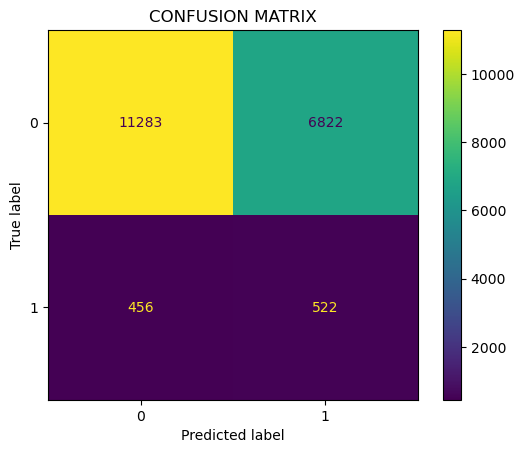

Accuracy:  0.6186134255620186
Precision:  0.07107843137254902
Recall:  0.5337423312883436
F1 Score:  0.12545061283345352


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Fit a logistic regression model on the upsampled data
model_upsampled = LogisticRegression()
model_upsampled.fit(X_train_upsampled, y_train_upsampled)

# Predict on test data after upsampling
y_pred_upsampled = model_upsampled.predict(X_test_processed)

#predictions using a confusion matrix:
cm = confusion_matrix(y_test, y_pred_upsampled)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classification.classes_)
cm_display.plot()
plt.title('CONFUSION MATRIX')
plt.show()

# looking at predictions parameters:
print("Accuracy: ",accuracy_score(y_test,y_pred_upsampled))
print("Precision: ",precision_score(y_test,y_pred_upsampled))
print("Recall: ",recall_score(y_test,y_pred_upsampled))
print("F1 Score: ",f1_score(y_test,y_pred_upsampled))

In [23]:
## Model is worse now ,we can check the confusion matrix 
# This time we have 6822 as False positives,we incorrectly predicted as donors, but they are non-donors.
# we have 452 False negatives, we incorrectly predicted as non-donors, but they are actually donors.

In [75]:
print("price of false positives:", 6822*.68)
print("revenue from identifying donors:", 456*15)

price of false positives: 4638.96
revenue from identifying donors: 6840


In [25]:
#Lets check the model by down sampling the data

# DownSampling

In [26]:
# Downsample the majority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Combine majority class with upsampled minority class
train_downsampled = pd.concat([majority_downsampled, minority_class])

# Separate features and target variable again
X_train_downsampled = train_downsampled.drop('TARGET_B', axis=1)
y_train_downsampled = train_downsampled['TARGET_B']


print(f"Class distribution before downsampling:\n{train_data['TARGET_B'].value_counts()}")
print(f"Class distribution after downsampling:\n{train_downsampled['TARGET_B'].value_counts()}")



Class distribution before downsampling:
TARGET_B
0    72464
1     3865
Name: count, dtype: int64
Class distribution after downsampling:
TARGET_B
0    3865
1    3865
Name: count, dtype: int64


# Model

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


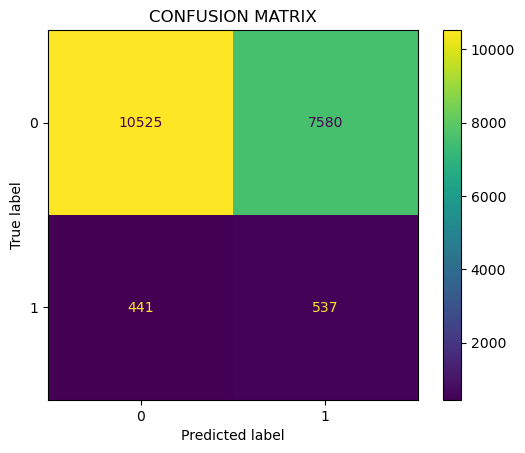

Accuracy:  0.5796782476549809
Precision:  0.06615744733275841
Recall:  0.549079754601227
F1 Score:  0.11808686091258934


In [27]:
# Fit a logistic regression model on the downsampled data
model_downsampled = LogisticRegression()
model_downsampled.fit(X_train_downsampled, y_train_downsampled)

# Predict on test data after downsampling
y_pred_downsampled = model_downsampled.predict(X_test_processed)

#predictions using a confusion matrix:
cm = confusion_matrix(y_test, y_pred_downsampled)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classification.classes_)
cm_display.plot()
plt.title('CONFUSION MATRIX')
plt.show()

# looking at predictions parameters:
print("Accuracy: ",accuracy_score(y_test,y_pred_downsampled))
print("Precision: ",precision_score(y_test,y_pred_downsampled))
print("Recall: ",recall_score(y_test,y_pred_downsampled))
print("F1 Score: ",f1_score(y_test,y_pred_downsampled))

In [28]:
#By downsampling we get more worse score
# This time we have 7580 as False positives,we incorrectly predicted as donors, but they are non-donors.
# we have 441 False negatives, we incorrectly predicted as non-donors, but they are actually donors.
#In comparison to upsampling it predicts more peolpe to b donors


In [29]:
print("price of false positives:", 7580*.68)
print("revenue from identifying donors:", 441*15)

price of false positives: 5154.400000000001
revenue from identifying donors: 6615


# LAB | RANDOM FOREST

In [30]:
# Apply the Random Forests algorithm AFTER upscaling the data to deal with the imbalance.

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_upsampled, y_train_upsampled)


RandomForestClassifier(max_depth=5, max_samples=0.8, min_samples_leaf=20,
                       min_samples_split=20, random_state=42)

TARGET_B
0    18105
1      978
Name: count, dtype: int64

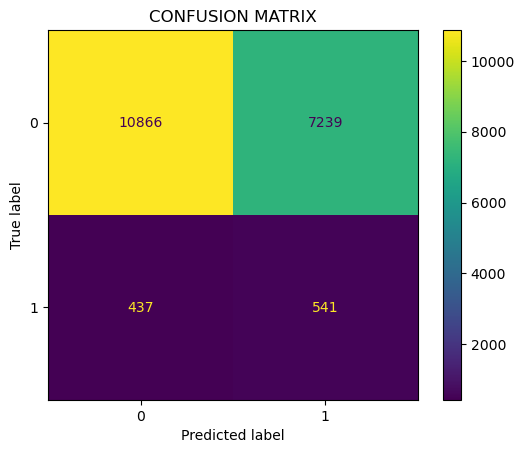

train score:  0.6178792227864871
test score:  0.5977571660640361

accuracy:  0.5977571660640361
precision:  0.06953727506426735
recall:  0.5531697341513292
f1:  0.12354418817081525


In [31]:
y_pred = clf.predict(X_test_processed)
display(y_test.value_counts())

#Visualizing our predictions using a confusion matrix:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
cm_display.plot()
plt.title('CONFUSION MATRIX')
plt.show()

# looking at predictions parameters:
print("train score: ", clf.score(X_train_upsampled, y_train_upsampled))
print("test score: ", clf.score(X_test_processed, y_test))
print("")
print("accuracy: ",accuracy_score(y_test,y_pred))
print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))
print("f1: ",f1_score(y_test,y_pred))

In [32]:
# we get almost similar result as the Logistic Regression Model before.

In [33]:
#Now lets select the feautures ,keep only the important ones and see if it changes our score.

# Selecting Features¶

In [34]:
# from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_scaled = scaler.fit_transform(numerical)


In [35]:
X = numerical_scaled
y = target['TARGET_B']
train_num_scaled.shape

(76329, 315)

In [36]:
from sklearn.feature_selection import SelectKBest,chi2

# To check the scores
model = SelectKBest(chi2, k=10).fit(X, y)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = numerical.columns
df


,score,Column
0,0.542861,TCODE
1,0.212688,AGE
2,3.992481,INCOME
3,0.159057,WEALTH1
4,0.395422,HIT
...,...,...
310,0.966990,AVGGIFT
311,2.751733,CONTROLN
312,0.328475,HPHONE_D
313,210.290810,RFA_2F


In [37]:
cols = df.sort_values(by = ['score'], ascending = False).head(30)['Column']
cols

313      RFA_2F
305    CARDGIFT
110        HVP1
111        HVP2
112        HVP3
115        HVP6
113        HVP4
22         ETH2
129         RP1
130         RP2
304    NGIFTALL
83          HV1
84          HV2
108       ETHC5
107       ETHC4
299    CARDPROM
300     NUMPROM
131         RP3
114        HVP5
314    CLUSTER2
2        INCOME
86          HV4
85          HV3
150        IC15
133         MSA
158        IC23
311    CONTROLN
162       HHAS4
161       HHAS3
279         HC6
Name: Column, dtype: object

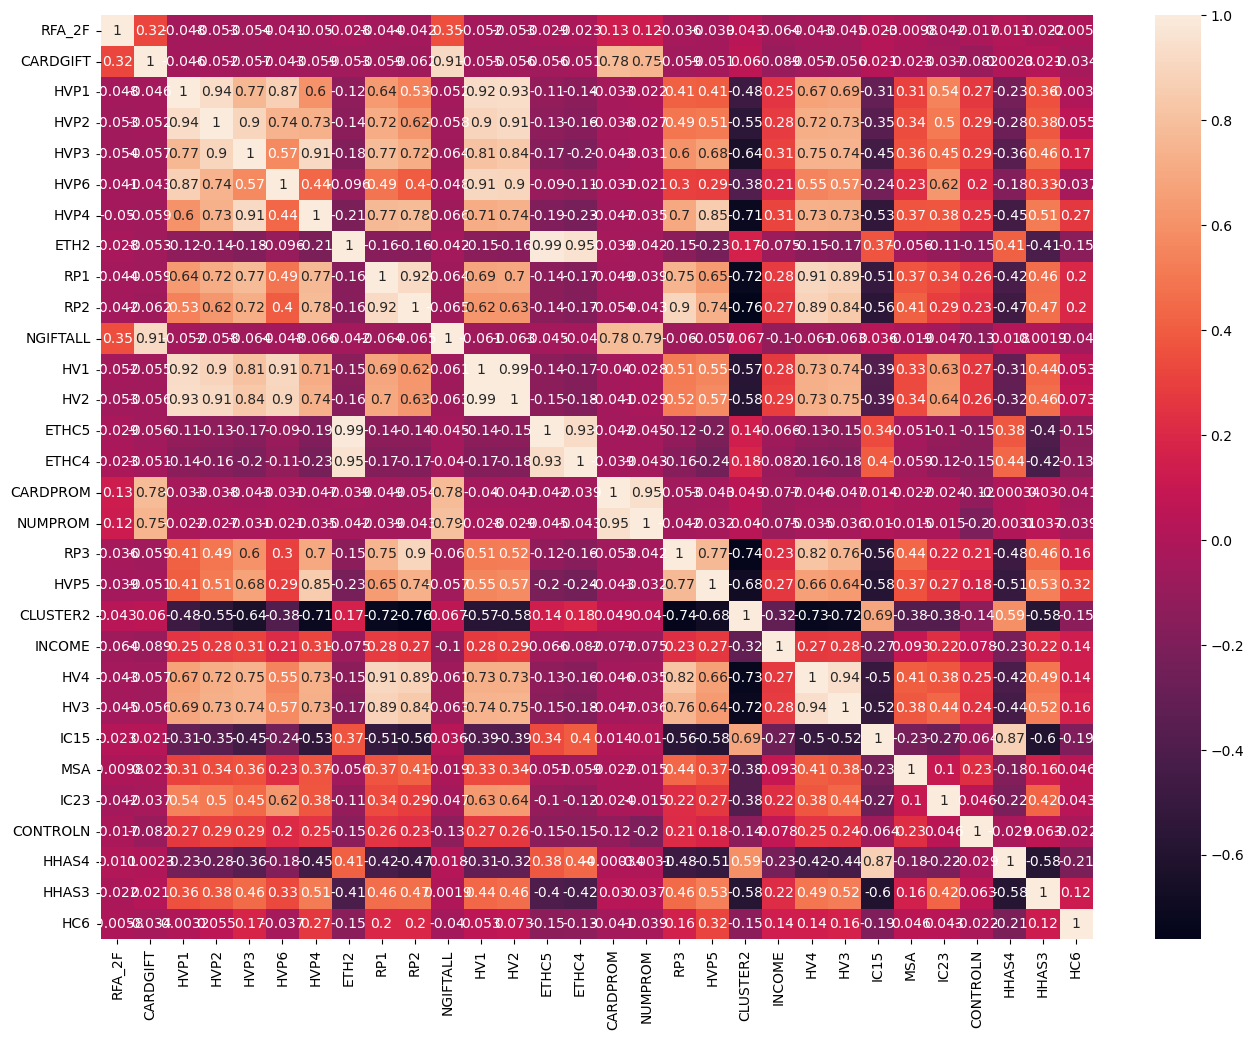

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = numerical[cols].corr(method='pearson')
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, ax=ax)
plt.show()

# 
. Selecting numerical columns based on the fact that they are not colinear with each other. Out of the above columns, dropping
NGIFTALL,'HVP2','HVP6','HV1','HV2',HVP4,ETHC5','ETHC4,'RP2','HV4','HV3',NUMPROM,HVP6','HV2'

In [39]:
# # Keep only the top 60 features in the numerical DataFrame
# numerical = numerical[['RFA_2F','CARDGIFT','HVP1','HVP3','ETHC2','RP3','HVP5','CLUSTER2','INCOME','IC15','MSA']]
# numerical

In [40]:
#  we drop the features from both the scaled and upsampled data

In [41]:
# List of columns to keep
columns_to_keep = ['RFA_2F', 'CARDGIFT', 'HVP1', 'HVP3', 'ETHC2', 'RP3', 'HVP5', 'CLUSTER2', 'INCOME', 'IC15', 'MSA']

# Selecting only the specified columns in the upsampled data
X_train_upsampled = X_train_upsampled[columns_to_keep]

# Selecting only the specified columns in the scaled data
X_train_processed = X_train_processed[columns_to_keep]
X_test_processed = X_test_processed[columns_to_keep]

X_train_processed.shape
X_test_processed.shape
X_train_upsampled.shape

(144928, 11)

In [42]:
# We now run Random Forest Model after the feature selection
clf = RandomForestClassifier(max_depth=5, # max number of questions to ask
                             min_samples_split=20, # amount of rows still considered at every question
                             min_samples_leaf =20, # ultimate answer based on at least this many rows
                             max_samples=0.8, # fraction of X-train to use in each tree
                             random_state=42)
clf.fit(X_train_upsampled, y_train_upsampled)
print(clf.score(X_train_upsampled, y_train_upsampled))
print(clf.score(X_test_processed, y_test))

y_pred = clf.predict(X_test_processed)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

0.6033409693088982
0.6297227899177278


TARGET_B
0    18105
1      978
Name: count, dtype: int64

array([[11508,  6597],
       [  469,   509]])

In [43]:
# I would like to check which classification gives the better prediction.Was Random Forest better ??
# This way, we'll save resources by only sending mail to past donors who are likely to give again.

In [44]:
# Models
model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier()
model3 = LogisticRegression(max_iter=1000)  # Increased max_iter

# Pipeline and names
model_pipeline = [model1, model2, model3]
model_names = ['Decision Tree Classifier', 'Random Forest Classifier', 'Logistic Regression']
scores = {}

for model, model_name in zip(model_pipeline, model_names):
    try:
        mean_score = np.mean(cross_val_score(model, X_train_upsampled, y_train_upsampled, cv=5))
        scores[model_name] = mean_score
    except Exception as e:
        print(f"Error with model {model_name}: {e}")
        scores[model_name] = np.nan

print(scores)

{'Decision Tree Classifier': 0.9675148994676854, 'Random Forest Classifier': 0.997999006402608, 'Logistic Regression': 0.5848627809483873}


In [45]:
# We can clearly see that Random Forest proves to be the best among all other classifier


# Now run the prediction for all the data, add it to the original dataframe and save it as csv.


In [46]:
Final_df= pd.concat([X_train_processed,X_test_processed], axis=0)

y_pred = clf.predict(Final_df)
final_predicted_df = pd.DataFrame(y_pred, columns = ['PREDICTED_TARGET_B'])
final_predicted_df

,PREDICTED_TARGET_B
0,0
1,0
2,1
3,0
4,0
...,...
95407,0
95408,0
95409,0
95410,1


In [47]:
the_final_df = pd.concat([numerical, categorical, target, final_predicted_df], axis=1)
the_final_df

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D,PREDICTED_TARGET_B
0,0,60.000000,5,9,0,0,39,34,18,10,...,8,94,2,95,12,89,11,0,0.0,0
1,1,46.000000,6,9,16,0,15,55,11,6,...,10,95,12,95,12,93,10,0,0.0,0
2,1,61.611649,3,1,2,0,20,29,33,6,...,11,92,7,95,12,90,1,0,0.0,1
3,0,70.000000,1,4,2,0,23,14,31,3,...,11,94,11,95,12,87,2,0,0.0,0
4,0,78.000000,3,2,60,1,28,9,53,26,...,10,96,1,96,1,79,3,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,2,96,2,96,2,96,2,0,0.0,0
95408,1,48.000000,7,9,1,0,31,43,19,4,...,3,96,3,96,3,96,3,0,0.0,0
95409,1,60.000000,5,9,0,0,18,46,20,7,...,3,95,1,96,10,94,10,0,0.0,0
95410,0,58.000000,7,9,0,0,28,35,20,9,...,11,96,8,97,1,86,12,1,18.0,1


In [48]:
the_final_df.to_csv('data_with_predicted_B.csv', index=False)

# LAB | LINEAR REGRESSION MODEL

In [49]:
# Selecting our donors subset from the dataset

In [50]:
# here we subset those that have made a donation (Target B) and use that subset to create a model to predict how much money will they give (Target D) (Regression Model).
donors_data = the_final_df[the_final_df['TARGET_B']==1]
donors_data = donors_data.drop(['PREDICTED_TARGET_B','TARGET_B'], axis=1)
donors_data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_D
20,2,62.000000,3,8,10,2,25,40,27,11,...,1,88,1,94,4,96,3,87,1,4.0
30,0,61.611649,5,9,0,1,37,58,16,8,...,2,90,4,93,1,95,12,90,4,7.0
45,0,66.000000,5,9,5,0,33,24,39,6,...,10,93,12,94,4,96,2,87,4,5.0
78,0,69.000000,6,9,0,0,34,20,54,2,...,7,90,1,95,3,95,11,90,1,13.0
93,1,73.000000,1,7,10,0,21,53,8,5,...,10,92,9,95,9,95,9,92,9,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95298,2,45.000000,5,9,0,0,45,28,37,9,...,4,89,6,96,1,96,1,86,8,20.0
95309,0,51.000000,5,6,1,1,32,43,24,7,...,1,93,10,94,2,95,12,93,10,15.0
95398,0,86.000000,5,9,0,1,32,21,26,9,...,10,89,6,95,11,96,2,87,11,3.0
95403,0,58.000000,4,9,0,0,24,46,20,6,...,1,90,3,93,12,96,1,90,3,10.0


# Train and test split

In [51]:
X = donors_data.drop(['TARGET_D'], axis=1)
y = donors_data['TARGET_D']


In [52]:
# Split the data into a training set and a test set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split further into train_num and train_cat. Also test_num and test_cat.

X_train_num = X_train.select_dtypes('number')
X_train_cat = X_train.select_dtypes('object')

X_test_num = X_test.select_dtypes('number')
X_test_cat = X_test.select_dtypes('object')


In [53]:
#Scaling the numerical columns

transformer = MinMaxScaler().fit(X_train_num)
x_normalized = transformer.transform(X_train_num)
x_normalized_train = pd.DataFrame(x_normalized, columns=X_train_num.columns)

# We use the transformer on the test data

x_normalized_test = transformer.transform(X_test_num)
x_normalized_test = pd.DataFrame(x_normalized_test, columns=X_test_num.columns)


In [54]:
# Encoding the categorical ones.

encoder = OneHotEncoder(drop='first', handle_unknown='ignore').fit(X_train_cat)
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
X_train_cat_encode = pd.DataFrame(encoder.transform(X_train_cat).toarray(),columns=cols)


# Encoding the test

X_test_cat_encode = pd.DataFrame(encoder.transform(X_test_cat).toarray(),columns=cols)


In [55]:
# Re-concatenate train_num and train_cat as X_train as well as test_num and test_cat as X_test

X_train = pd.concat((x_normalized_train,X_train_cat_encode),axis=1)
X_test = pd.concat((x_normalized_test,X_test_cat_encode),axis=1)
X_train

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,FIRSTDATE_MM_11,FIRSTDATE_MM_12,FIRSTDATE_MM_2,FIRSTDATE_MM_3,FIRSTDATE_MM_4,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE_MM_7,FIRSTDATE_MM_8,FIRSTDATE_MM_9
0,0.000000,0.361702,0.166667,1.0,0.000000,0.052083,0.278481,0.585859,0.000000,0.208333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000026,0.489362,0.666667,1.0,0.000000,0.041667,0.518987,0.656566,0.050505,0.145833,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.436170,0.833333,1.0,0.004167,0.000000,0.443038,0.343434,0.323232,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.612890,0.666667,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.425532,0.000000,1.0,0.000000,0.000000,0.544304,0.252525,0.303030,0.208333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3869,0.000026,0.457447,0.666667,1.0,0.000000,0.000000,0.417722,0.363636,0.252525,0.312500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3870,0.000000,0.500000,1.000000,1.0,0.045833,0.010417,0.329114,0.424242,0.121212,0.125000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3871,0.000718,0.627660,0.666667,1.0,0.000000,0.000000,0.569620,0.121212,0.323232,0.187500,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3872,0.000000,0.936170,0.166667,1.0,0.000000,0.000000,0.392405,0.171717,0.313131,0.208333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
# these are the  columns I want to keep
columns_to_keep = ['RFA_2F', 'CARDGIFT', 'HVP1', 'HVP3', 'ETHC2', 'RP3', 'HVP5', 'CLUSTER2', 'INCOME', 'IC15', 'MSA']


# Selecting only the specified columns in the scaled data
X_train = X_train[columns_to_keep]
X_test = X_test[columns_to_keep]

X_train.shape
X_test.shape


(969, 11)

In [57]:
# Now to run our regression model.We are using linear regression becuase we want to predict values
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
print(lm.score(X_train,y_train))
y_pred = lm.predict(X_test)
print(mean_squared_error(y_pred,y_test))

0.155534117858395
127.97478036939222


In [58]:
# The score seems to b really bad..I want to check for other models as well

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Define the models
models = [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor()]

# Train and test each model
for model in models:
    model.fit(X_train, y_train)
    
    # Predictions on training data
    pred_train = model.predict(X_train)
    score_train = r2_score(y_train, pred_train)
    
    # Predictions on test data
    pred_test = model.predict(X_test)
    score_test = r2_score(y_test, pred_test)
    
    # Calculate mean absolute error
    mae = round(mean_absolute_error(y_test, pred_test), 2)
    
    # Print the results
    print(model)
    print(f"Train score: {score_train}, Test score: {score_test}, Mean Absolute Error: {mae}")


LinearRegression()
Train score: 0.155534117858395, Test score: 0.13949567463973034, Mean Absolute Error: 6.37
KNeighborsRegressor()
Train score: 0.3600668981810571, Test score: -0.033371856295723035, Mean Absolute Error: 6.99
DecisionTreeRegressor()
Train score: 0.999731744797549, Test score: -0.7137959342077418, Mean Absolute Error: 8.97


In [60]:
# We can notice The LinearRegression model has the highest test score (0.1395) and the lowest MAE (6.37) among the three models,
# indicating it performs best overall. I therefore will move forward with this model

In [61]:
# Now we want to find all the people we think will donate next time.

pred_donor_data = the_final_df[the_final_df['PREDICTED_TARGET_B'] == 1].reset_index(drop=True)
pred_model = pred_donor_data.drop(['TARGET_D','TARGET_B'], axis=1)
pred_model

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,PREDICTED_TARGET_B
0,1,61.611649,3,1,2,0,20,29,33,6,...,2,91,11,92,7,95,12,90,1,1
1,1,75.000000,1,5,3,0,21,14,42,2,...,1,95,12,95,9,95,12,95,9,1
2,0,72.000000,4,2,16,2,30,31,33,9,...,3,95,7,91,2,96,1,89,5,1
3,1,61.611649,5,9,0,0,27,37,28,10,...,2,92,11,94,12,96,12,92,10,1
4,2,46.000000,7,9,0,0,30,35,27,4,...,1,89,6,95,12,95,12,88,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35934,28,70.000000,5,3,14,0,36,18,60,7,...,1,95,11,94,10,96,1,93,11,1
35935,1,68.000000,5,9,0,0,33,32,35,8,...,9,87,7,95,12,95,12,86,10,1
35936,0,86.000000,5,9,0,1,32,21,26,9,...,10,89,6,95,11,96,2,87,11,1
35937,28,61.611649,5,9,0,0,41,12,69,7,...,2,95,8,94,12,95,8,93,5,1


In [62]:
# We have to go thourgh the same process again 
# Split into X_num and X_cat

X = pred_model.drop(['PREDICTED_TARGET_B'], axis=1)

X_num = X.select_dtypes('number')
X_cat = X.select_dtypes('object')

# Now we scale the numerical columns using the transformer from before

x_normalized = transformer.transform(X_num)
x_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)


# Then we encode the categorical ones.

X_cat_encode = pd.DataFrame(encoder.transform(X_cat).toarray(),columns=cols)

# Re-concatenate X_num and X_cat

X = pd.concat((x_normalized,X_cat_encode),axis=1)


# Selecting only the specified columns
X = X[columns_to_keep]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [10, 11, 12, 14, 16, 20] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [63]:
y_pred = lm.predict(X)
y_pred_df = pd.DataFrame(y_pred, columns = ['PREDICTED_TARGET_D'])
y_pred_df

,PREDICTED_TARGET_D
0,5.497647
1,16.254975
2,8.837225
3,20.061040
4,20.942313
...,...
35934,10.047578
35935,16.043236
35936,14.526835
35937,20.986060


In [64]:
predicted_df = pd.concat([pred_donor_data, y_pred_df], axis=1)
predicted_df

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D,PREDICTED_TARGET_B,PREDICTED_TARGET_D
0,1,61.611649,3,1,2,0,20,29,33,6,...,92,7,95,12,90,1,0,0.0,1,5.497647
1,1,75.000000,1,5,3,0,21,14,42,2,...,95,9,95,12,95,9,0,0.0,1,16.254975
2,0,72.000000,4,2,16,2,30,31,33,9,...,91,2,96,1,89,5,0,0.0,1,8.837225
3,1,61.611649,5,9,0,0,27,37,28,10,...,94,12,96,12,92,10,0,0.0,1,20.061040
4,2,46.000000,7,9,0,0,30,35,27,4,...,95,12,95,12,88,1,0,0.0,1,20.942313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35934,28,70.000000,5,3,14,0,36,18,60,7,...,94,10,96,1,93,11,0,0.0,1,10.047578
35935,1,68.000000,5,9,0,0,33,32,35,8,...,95,12,95,12,86,10,0,0.0,1,16.043236
35936,0,86.000000,5,9,0,1,32,21,26,9,...,95,11,96,2,87,11,1,3.0,1,14.526835
35937,28,61.611649,5,9,0,0,41,12,69,7,...,94,12,95,8,93,5,0,0.0,1,20.986060


In [65]:
# Lets see how does the revenue from the original dataset differ from  the predicted revenue from potential donors?

In [66]:
# Calculating the operation cost for the original dataset
# 95412 mails were sent and the package cost is $0.68/mail:
cost_original = 95412 * 0.68  # Number of mails * cost per mail
print("Operation cost: ", cost_original)

Operation cost:  64880.16


In [69]:
# 35939 mails were sent and the package cost is $0.68/mail:
cost_predicted = 35939 * 0.68  # Number of mails * cost per mail
print("Operation cost: ", cost_predicted)

Operation cost:  24438.52


In [67]:
#If we only send mail to the people we think will donate, we'd save $27.50.

In [70]:
#the savings in mailing costs
(cost_original - cost_predicted) * 0.68

27500.3152

# 
It would be good to see if we can get more money from each mailing. Since we're now sending mail to specific people, we should expect more donations. If the average donation doesn't drop, it means we're getting more money per mailing. We can use this as a way to check if our prediction model is effective in practice.

In [71]:
##average donation per mail sent (original data)
target['TARGET_D'].sum() / target['TARGET_B'].count()

0.7930731983398315

In [72]:
#average donation per mail sent(predicted data)
predicted_df['TARGET_D'].sum()/predicted_df['PREDICTED_TARGET_B'].count()

0.802961128578981

In [73]:
# I couldn't increase the average donation per mailing, but let's check if we made more money overall.
#original data
#the profit from the mailing operation(total donation - cost of mailing)
target['TARGET_D'].sum() - target.shape[0] * 0.68

10788.539999999994

In [74]:
# predicted data
#the profit from the mailing operation(total donation - cost of mailing)
predicted_df['TARGET_D'].sum() - y_pred_df.shape[0] * 0.68

4419.0999999999985

In [ ]:
# Right now, our prediction model is doing worse than just mailing everyone on the list because it's picking the wrong people. 
# We need to go back and work on the model to make better predictions